# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nadeemh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
newsapi_key = os.getenv("NEWS_API_KEY")
# print(f"NEWS_API_KEY: {newsapi_key}")

In [3]:
# Create a newsapi client

newsapi = NewsApiClient(api_key=newsapi_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")

# Show sample article
bitcoin_news['articles'][0]

Total articles about Bitcoin: 9946


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Arielle Pardes',
 'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
 'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
 'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
 'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
 'publishedAt': '2022-05-10T16:59:46Z',
 'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'}

In [5]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")

# Print total articles
print(f"Total articles about Ethereum: {ethereum_news['totalResults']}")

# Show sample article
ethereum_news['articles'][0]

Total articles about Ethereum: 4803


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': "Here's what NFTs look like on Instagram",
 'description': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital wallet and posting for the world to see. If you like, the social …",
 'url': 'https://www.engadget.com/instagram-nft-details-131020868.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2022-05/2546c160-d05e-11ec-b75e-e45eaa8c5b2b',
 'publishedAt': '2022-05-10T13:10:20Z',
 'content': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]"}

In [6]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        bitcoin_sentiments.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'neutral': neu,
            'negative': neg
        })
    except AttributeError:
        pass

bitcoin_df = pd.DataFrame(bitcoin_sentiments)

cols = ['date','text','compound','positive','negative','neutral']
bitcoin_df = bitcoin_df[cols]

bitcoin_df.tail()

,date,text,compound,positive,negative,neutral
15,2022-05-10,May 10 (Reuters) - Bitcoin has scant experienc...,0.2263,0.085,0.060,0.855
16,2022-04-27,The Central African Republic has adopted bitco...,0.1280,0.042,0.000,0.958
17,2022-05-16,"Sam Bankman-Fried, founder of the digital asse...",0.4051,0.132,0.059,0.809
18,2022-04-18,"If you want to pay online, you need to registe...",0.5719,0.157,0.068,0.775
19,2022-05-13,El Salvador which became the first country to ...,-0.2023,0.042,0.064,0.894


In [7]:
# Create the Ethereum sentiment scores DataFrame

ethereum_sentiments = []

for article in ethereum_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        ethereum_sentiments.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'neutral': neu,
            'negative': neg
        })
    except AttributeError:
        pass

ethereum_df = pd.DataFrame(ethereum_sentiments)

cols = ['date','text','compound','positive','negative','neutral']
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
2,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
3,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858
4,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.007080,0.068500,0.066150,0.865300
std,0.382331,0.064372,0.057928,0.092949
min,-0.549900,0.000000,0.000000,0.557000
25%,-0.335475,0.000000,0.039000,0.827000
50%,0.012800,0.064000,0.063000,0.888000
75%,0.350450,0.092250,0.077000,0.924250
max,0.750600,0.202000,0.241000,0.964000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,-0.010760,0.05290,0.047500,0.899700
std,0.433743,0.07589,0.044936,0.063144
min,-0.690800,0.00000,0.000000,0.731000
25%,-0.284450,0.00000,0.000000,0.858750
50%,-0.189700,0.00000,0.059000,0.923000
75%,0.303775,0.07650,0.069000,0.937000
max,0.865500,0.26900,0.178000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of stopwords
    sw = set(stopwords.words('english'))
    
    # Create custom stopwords
    sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'has', 'the', 'ha'}
    
    # Define the regex parameters
    regex = re.compile("[^a-zA-Z ]")
    
    # Apply regex parameters to text
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin

bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, always, bitcoin, skeptic, bi..."
3,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833,"[kid, remember, father, tried, use, broom, han..."
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."


In [14]:
# Create a new tokens column for Ethereum

ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[meta, revealed, nfts, work, instagram, usbase..."
1,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."
2,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[bored, ape, yacht, club, creator, yuga, labs,..."
3,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858,"[april, reuters, ether, promised, better, prom..."
4,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935,"[ethereum, preparing, upgrade, thats, describe..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2

# convert tokens to a list of lists
corpus = bitcoin_df['tokens'].tolist()

# convert from a list of lists to a flat list
flat_list_btc = []
for sublist in corpus:
    for item in sublist:
        flat_list_btc.append(item)
# print(flat_list_btc)

bigram_counts = Counter(ngrams(flat_list_btc, n=2))
print(dict(bigram_counts))

{('even', 'though'): 1, ('though', 'number'): 1, ('number', 'womenfocused'): 1, ('womenfocused', 'crypto'): 1, ('crypto', 'space'): 1, ('space', 'odeniran'): 1, ('odeniran', 'say'): 1, ('say', 'woman'): 1, ('woman', 'still'): 1, ('still', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'space'): 1, ('space', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'char'): 2, ('char', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'lost'): 1, ('lost', 'gas'): 1, ('gas', 'oil'): 1, ('oil', 'well'): 1, ('well', 'near'): 1, ('near', 'linden'): 1, ('linden', 'texas'): 1, ('texas', 'april'): 1, ('april', 'th'): 1, ('th', 'photo'): 1, ('photo', 'francois'): 1, ('francois', 'picardafp'): 1, ('picardafp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'images'): 1, ('images', 'corporate'): 1, ('corporate', 'climate'): 1, ('climate', 'hype'): 1, ('hype', '

In [21]:
# Generate the Ethereum N-grams where N=2

# convert tokens to a list of lists
corpus = ethereum_df['tokens'].tolist()
# print(corpus)

# convert from a list of lists to a flat list
flat_list_eth = []
for sublist in corpus:
    for item in sublist:
        flat_list_eth.append(item)
flat_list_eth

bigrams = ngrams(flat_list_eth, n=2)

bigram_counts = Counter(ngrams(flat_list_eth, n=2))
print(dict(bigram_counts))

{('meta', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'instagram'): 1, ('instagram', 'usbased'): 1, ('usbased', 'test'): 1, ('test', 'show'): 1, ('show', 'youve'): 1, ('youve', 'bought'): 1, ('bought', 'created'): 1, ('created', 'free'): 1, ('free', 'connecting'): 1, ('connecting', 'instagram'): 1, ('instagram', 'account'): 1, ('account', 'compatible'): 1, ('compatible', 'digital'): 1, ('digital', 'walle'): 1, ('walle', 'char'): 1, ('char', 'multibillion'): 1, ('multibillion', 'dollar'): 1, ('dollar', 'cryptocurrency'): 1, ('cryptocurrency', 'company'): 1, ('company', 'apologised'): 1, ('apologised', 'user'): 1, ('user', 'sale'): 1, ('sale', 'metaverse'): 1, ('metaverse', 'land'): 1, ('land', 'sparked'): 1, ('sparked', 'frenzy'): 1, ('frenzy', 'temporarily'): 1, ('temporarily', 'brought'): 1, ('brought', 'ethereum'): 1, ('ethereum', 'cryptocurrencyyuga'): 1, ('cryptocurrencyyuga', 'labs'): 1, ('labs', 'comp'): 1, ('comp', 'char'): 1, ('char', 'bored'): 1, ('b

In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin

top_10 = token_count(flat_list_btc, 10)
top_10

[('char', 19),
 ('bitcoin', 12),
 ('cryptocurrency', 11),
 ('world', 6),
 ('reuters', 5),
 ('investor', 4),
 ('dropped', 4),
 ('may', 4),
 ('previous', 4),
 ('closebitcoin', 4)]

In [24]:
# Use token_count to get the top 10 words for Ethereum

top_10 = token_count(flat_list_eth, 10)
top_10

[('char', 20),
 ('cryptocurrency', 9),
 ('bitcoin', 7),
 ('world', 6),
 ('ethereum', 5),
 ('biggest', 5),
 ('reuters', 5),
 ('last', 5),
 ('may', 5),
 ('nft', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

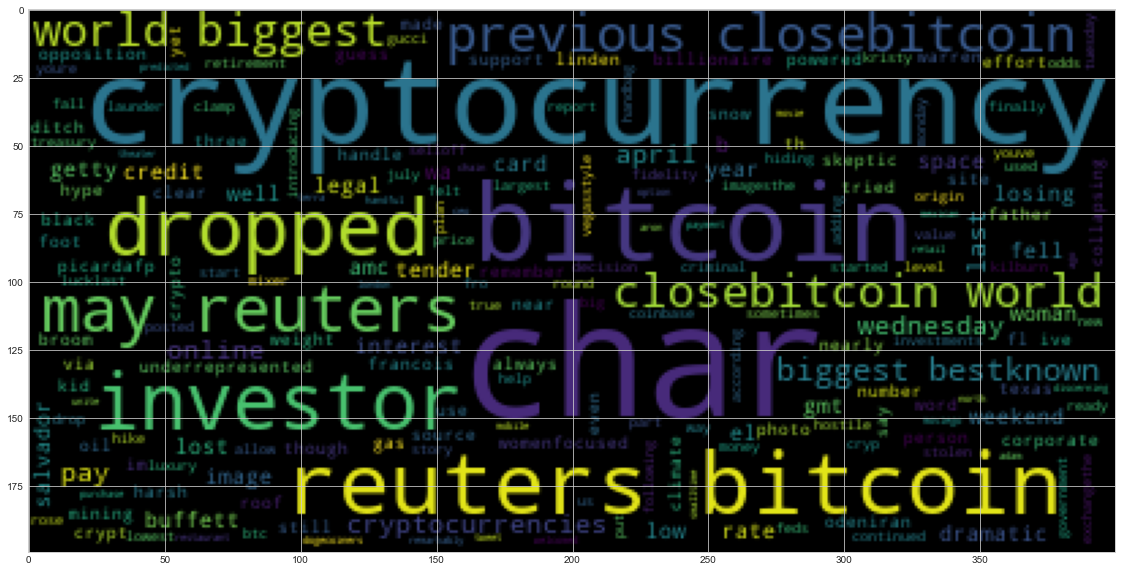

In [26]:
# Generate the Bitcoin word cloud

# Process text for wordcloud creation
big_string_btc = ' '.join(flat_list_btc)

wc = WordCloud().generate(big_string_btc)
plt.imshow(wc)

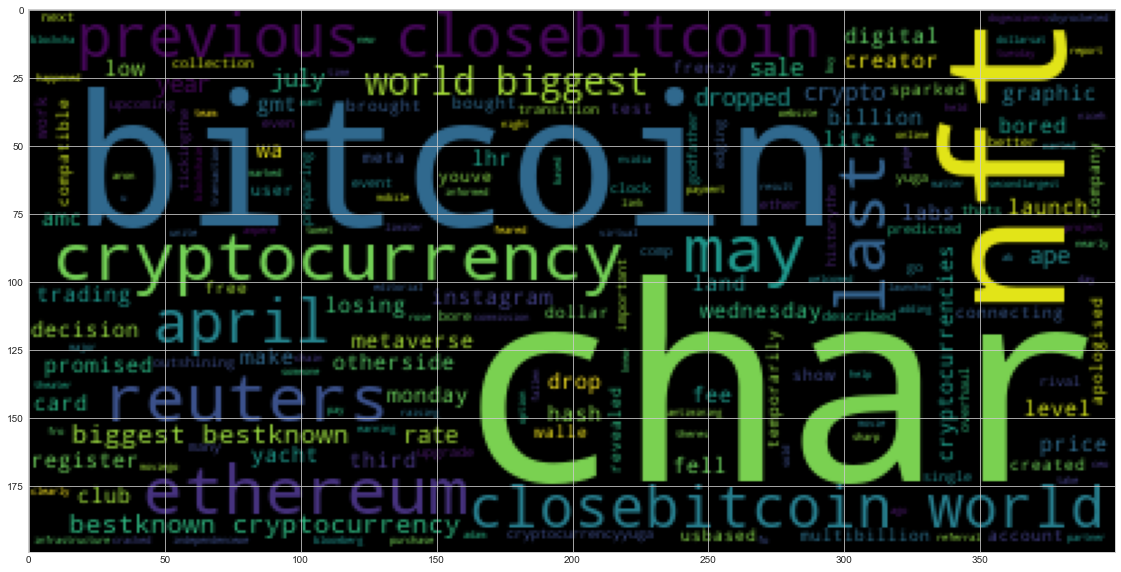

In [27]:
# Generate the Ethereum word cloud

# Process text for wordcloud creation
big_string_eth = ' '.join(flat_list_eth)

wc = WordCloud().generate(big_string_eth)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [46]:
import spacy
from spacy import displacy

In [47]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [48]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [49]:
# Concatenate all of the Bitcoin text together

big_str = ''

for i in range(0, bitcoin_df['text'].shape[0]):
    big_str += bitcoin_df['text'][i]

str

In [64]:
# Run the NER processor on all of the text
doc = nlp(big_str)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin Named Entity Recognition' 

In [65]:
# Render the visualization
displacy.render(doc, style='ent')

In [59]:
# List all Entities
# print ([(ent.text.strip(), ent.label_) for ent in doc.ents])
[(ent.text, ent.label_) for ent in doc.ents]

[('Odeniran', 'GPE'),
 ('Linden', 'GPE'),
 ('Texas', 'GPE'),
 ('April 4th, 2022', 'DATE'),
 ('Photo', 'PERSON'),
 ('FRANCOIS PICARD/AFP', 'ORG'),
 ('Getty Images', 'ORG'),
 ('Buffett', 'PERSON'),
 ('the weekend', 'DATE'),
 ('nearly three feet', 'QUANTITY'),
 ('Getty Images\r\n', 'ORG'),
 ('the weekend', 'DATE'),
 ('34,000', 'MONEY'),
 ('27,630', 'MONEY'),
 ('Coinbase', 'PERSON'),
 ('Last week', 'DATE'),
 ('Fidelity Investments', 'ORG'),
 ('the US Treasury', 'ORG'),
 ('last July', 'DATE'),
 ('33,000', 'MONEY'),
 ('the week', 'DATE'),
 ('last week', 'DATE'),
 ('Fed', 'ORG'),
 ('Bitcoin', 'ORG'),
 ('Gucci handbag', 'PERSON'),
 ('week', 'DATE'),
 ('Kristy Kilburn', 'PERSON'),
 ('May 11', 'DATE'),
 ('Reuters', 'ORG'),
 ('7.23%', 'PERCENT'),
 ('28,758.29', 'MONEY'),
 ('GMT', 'WORK_OF_ART'),
 ('Wednesday', 'DATE'),
 ('2,241.68', 'MONEY'),
 ('40.4%', 'PERCENT'),
 ('+361 chars]May 4', 'ORG'),
 ('Reuters', 'ORG'),
 ('5.7%', 'PERCENT'),
 ('39,862.84', 'MONEY'),
 ('Wednesday', 'DATE'),
 ('2,102.94

---

### Ethereum NER

In [60]:
# Concatenate all of the Ethereum text together

big_str = ''

for i in range(0, ethereum_df['text'].shape[0]):
    big_str += ethereum_df['text'][i]

In [66]:
# Run the NER processor on all of the text
doc = nlp(big_str)

# Add a title to the document
doc.user_data['title'] = 'Ethereum Named Entity Recognition' 

In [67]:
# Render the visualization
displacy.render(doc, style='ent')

In [68]:
# List all Entities
[(ent.text, ent.label_) for ent in doc.ents]

[('Meta', 'ORG'),
 ('Instagram', 'ORG'),
 ('US', 'GPE'),
 ('Instagram', 'ORG'),
 ('Ethereum', 'ORG'),
 ('Yuga Labs', 'PERSON'),
 ('Yacht Club', 'ORG'),
 ('Yuga Labs', 'PERSON'),
 ('Otherside NFT', 'LAW'),
 ('April 30', 'DATE'),
 ('NFT', 'ORG'),
 ('chars]April 26', 'DATE'),
 ('Reuters', 'ORG'),
 ('No.2', 'CARDINAL'),
 ('second', 'ORDINAL'),
 ('AMC', 'ORG'),
 ('April 15', 'DATE'),
 ('AMC', 'ORG'),
 ('Adam Aron', 'PERSON'),
 ('Last night', 'TIME'),
 ('Bloomberg', 'GPE'),
 ('nearly a third', 'CARDINAL'),
 ('a billion dollars', 'MONEY'),
 ('IndependenceWe', 'NORP'),
 ('chars]40 days ago', 'DATE'),
 ('47,454', 'MONEY'),
 ('34,007', 'MONEY'),
 ('28%.About a third', 'CARDINAL'),
 ('this week', 'DATE'),
 ('Nvidia', 'PERSON'),
 ('Ampere Lite Hash Rate', 'WORK_OF_ART'),
 ('LHR', 'ORG'),
 ('Ethereum', 'ORG'),
 ('4', 'CARDINAL'),
 ('Reuters', 'ORG'),
 ('5.7%', 'PERCENT'),
 ('39,862.84', 'MONEY'),
 ('Wednesday', 'DATE'),
 ('2,102.94', 'MONEY'),
 ('20.9%', 'PERCENT'),
 ('year', 'DATE'),
 ('Reuters', 

---